![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from random import random

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".
Inclusive, dê um exemplo de uma matriz, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes.

YOUR ANSWER HERE

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [70]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    final_matrix = []
    
    for i in range(1,m):
        line_0 = A[i-1][i-1]
        line_1 = A[i][i-1]
        A[i-1] /= line_0
        b[i-1] /= line_0
        A[i] /= line_1
        b[i] /= line_1
        A[i] -= A[i-1]
        b[i] -= b[i-1]
        
    for k in range(m)[::-1]:
        c = b[k]/A[k][k]
        final_matrix.append(c)
        b -= A[:,k]*c
    
    return np.array(final_matrix)[::-1]

Qual o papel do primeiro assert?

Verificar se o número de linhas da matriz A é igual à quantidade de elementos do vetor b.

In [71]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [72]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

Utilizando a função .dot para fazer a multiplicação da matriz A pelo resultado obtido com a função tridiag_solve, e então verificar se o resultado é o próprio vetor b, que pode ser feito através de um assert como por exemplo np.allclose.

In [73]:
A = np.array([[1, 2, 0], [2, 1, -1], [0, 1, -2]])
b = [1,1,1]

solution = tridiag_solve(A, b)
assert np.allclose(A.dot(solution), b)

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: o caixa abaixo pode usar algo como 2G de RAM, por conta das matrizes 8k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{13}$.
Se você não conseguir fazer funcionar até $2^{13}$,
reduza o maior valor do `logspace`, mas não reduza demais.

In [74]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
l = []

for i, n in enumerate(ns):
    start_1 = time()
    A = np.zeros((n,n))
    
    for i in range(1,n):
        A[i-1][i-1] = random()
        A[i-1][i] = random()
        A[i][i-1] = random()
        
    A[n-1][n-1] = random()
    b = [random() for i in range(n)]
    time_1 = abs(time() - start_1)
    t_create.append(time_1)
    
    start_2 = time()
    x = tridiag_solve(A, b)
    time_2 = abs(time() - start_2)
    t_solve.append(time_2)

Agora, faça um gráfico destes tempos, em função de $n$.

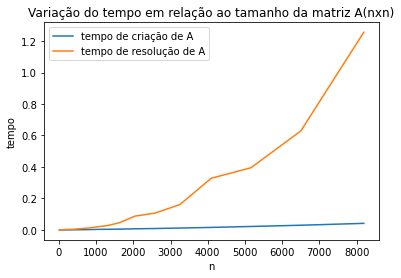

In [75]:
plt.title('Variação do tempo em relação ao tamanho da matriz A(nxn)')
plt.plot(ns,t_create,label='tempo de criação de A')
plt.plot(ns,t_solve,label='tempo de resolução de A')
plt.legend()
plt.xlabel('n')
plt.ylabel('tempo')
ax = plt.gca()

In [76]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [77]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert max(xs) <= 2**13

In [78]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A etapa de resolução. O que é bem coerente, visto que o computador na etapa de criação vai apenas ter que sortear entradas enquanto que para resolução vai ter que de fato efetuar cálculos que, conforme a matriz aumenta ficam mais complexos.

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

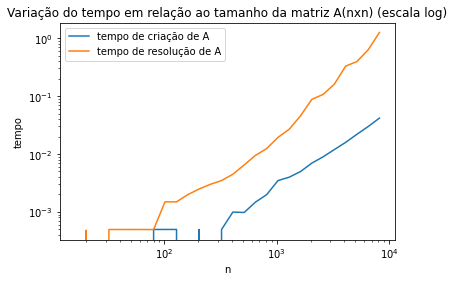

In [79]:
plt.title('Variação do tempo em relação ao tamanho da matriz A(nxn) (escala log)')
plt.loglog(ns,t_create,label='tempo de criação de A')
plt.loglog(ns,t_solve,label='tempo de resolução de A')
plt.legend()
plt.xlabel('n')
plt.ylabel('tempo')
ax = plt.gca()

Comente

Aparentemente a taxa de crescimento do tempo de criação e do tempo de resolução (por mais que tenham valores bem distantes) contecem de forma quadrática.

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [95]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float))
    b = np.copy(np.asarray(b, dtype=np.float))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"

In [96]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [97]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{13}$.

In [82]:
ns = np.logspace(4,13, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
l = []

for i, n in enumerate(ns):
    start_1 = time()
    A = np.zeros((n,n))
    
    for i in range(1,n):
        A[i-1][i-1] = random()
        A[i-1][i] = random()
        A[i][i-1] = random()
        
    A[n-1][n-1] = random()
    b = [random() for i in range(n)]
    time_1 = abs(time() - start_1)
    t_create.append(time_1)
    
    start_2 = time()
    x = pentadiag_solve(A, b)
    time_2 = abs(time() - start_2)
    t_solve.append(time_2)

<ipython-input-80-dc4da1cfde6c>:14: RuntimeWarning: divide by zero encountered in true_divide
  A[i-3] /= line_0
<ipython-input-80-dc4da1cfde6c>:14: RuntimeWarning: invalid value encountered in true_divide
  A[i-3] /= line_0
<ipython-input-80-dc4da1cfde6c>:15: RuntimeWarning: divide by zero encountered in double_scalars
  b[i-3] /= line_0
<ipython-input-80-dc4da1cfde6c>:17: RuntimeWarning: divide by zero encountered in true_divide
  A[i-2] /= line_1
<ipython-input-80-dc4da1cfde6c>:17: RuntimeWarning: invalid value encountered in true_divide
  A[i-2] /= line_1
<ipython-input-80-dc4da1cfde6c>:18: RuntimeWarning: divide by zero encountered in double_scalars
  b[i-2] /= line_1
<ipython-input-80-dc4da1cfde6c>:23: RuntimeWarning: invalid value encountered in true_divide
  A[i] /= line_3
<ipython-input-80-dc4da1cfde6c>:24: RuntimeWarning: invalid value encountered in double_scalars
  b[i] /= line_3


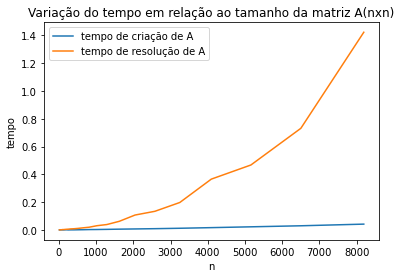

In [83]:
plt.title('Variação do tempo em relação ao tamanho da matriz A(nxn)')
plt.plot(ns,t_create,label='tempo de criação de A')
plt.plot(ns,t_solve,label='tempo de resolução de A')
plt.legend()
plt.xlabel('n')
plt.ylabel('tempo')
ax = plt.gca()

In [84]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

O que mudou?

YOUR ANSWER HERE